
# Final Portfolio Assessment  
## Regression Task

**Student Name:** Sachin Shrestha  
**Student ID:** 2461983  



#Task 1: Exploratory Data Analysis and Data Understanding

In [3]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/PRSA_Data_Aotizhongxin_20130301-20170228.csv")

print("Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())
print("\nColumns:", df.columns.tolist())

Shape: (35064, 18)

First 5 rows:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin



Columns: ['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Detailed Description of Dataset
###a. When and by whom the dataset was created

  The dataset was originally created by the Beijing Municipal Environmental Monitoring Center and later published as part of the PRSA (Public Research on Air Quality) project. It contains historical air quality and meteorological data collected between March 2013 and February 2017 for research and educational purposes.

###b. How and from where the dataset was accessed

The dataset was accessed as a CSV file from the Kaggle platform and used directly for this regression-based machine learning assignment in 2026.

###c. Justification of alignment with the selected UNSDG

This dataset aligns with UNSDG 3 – Good Health and Well-being and UNSDG 11 – Sustainable Cities and Communities. By analyzing and predicting air pollution levels (PM2.5), the dataset supports informed environmental policy decisions, helps reduce health risks caused by air pollution, and promotes healthier urban living conditions.

###d. Attributes Description

- Temporal features: year, month, day, hour

- Air quality features: PM10, SO2, NO2, CO, O3

- Meteorological features: temperature, pressure, dew point, wind speed

- Target variable: PM2.5 concentration (continuous numerical value used for regression)

#Meaningful Questions the Dataset Can Answer

1. Which factors most strongly influence PM2.5 air pollution levels?

    The dataset helps identify key contributors such as temperature, wind speed, atmospheric pressure, humidity, and concentrations of other pollutants (PM10, SO₂, NO₂, CO, O₃) that significantly affect PM2.5 levels.

2. Can machine learning models accurately predict PM2.5 concentration values?

    Yes, regression-based machine learning models can effectively predict continuous PM2.5 concentration levels with good accuracy using the available air quality and meteorological features.

# Assessing DataSet Quality

In [5]:

print("1. MISSING VALUES CHECK")

missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

print("\n2. TARGET VARIABLE DISTRIBUTION CHECK")

print("Summary statistics for PM2.5 (target variable):")
print(df["PM2.5"].describe().round(2))

print("\nPM2.5 percentiles:")
print(df["PM2.5"].quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).round(2))


print("\n3. DATA RELEVANCE CHECK")

print("All features are relevant for air quality prediction:")
print("- Temporal features: year, month, day, hour (seasonal & daily patterns)")
print("- Air quality features: PM10, SO2, NO2, CO, O3")
print("- Meteorological features: temperature, pressure, dew point, wind speed")
print("- Target variable: PM2.5 (continuous pollution concentration)")


print("\n4. NOISE & OUTLIERS CHECK")

print("Basic statistics for numerical features:")
print(df.describe().round(2))

print("\nPotential outliers (values beyond 3 standard deviations):")

for col in df.select_dtypes(include=["float64", "int64"]).columns:
    mean = df[col].mean()
    std = df[col].std()
    outliers = df[(df[col] < mean - 3*std) | (df[col] > mean + 3*std)]

    if len(outliers) > 0:
        print(f"{col}: {len(outliers)} potential outliers")




1. MISSING VALUES CHECK
Missing values per column:
No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

Total missing values: 7271

2. TARGET VARIABLE DISTRIBUTION CHECK
Summary statistics for PM2.5 (target variable):
count    34139.00
mean        82.77
std         82.14
min          3.00
25%         22.00
50%         58.00
75%        114.00
max        898.00
Name: PM2.5, dtype: float64

PM2.5 percentiles:
0.01      3.0
0.05      8.0
0.25     22.0
0.50     58.0
0.75    114.0
0.95    248.0
0.99    377.0
Name: PM2.5, dtype: float64

3. DATA RELEVANCE CHECK
All features are relevant for air quality prediction:
- Temporal features: year, month, day, hour (seasonal & daily patterns)
- Air quality features: PM10, SO2, NO2, CO, O3
- Meteorological 

#Exploratory Data Analysis (EDA)

In [6]:
import pandas as pd
import numpy as np


print("DATA CLEANING & SUMMARY STATISTICS (REGRESSION)")

df_clean = df.copy()
print(f"Dataset shape: {df_clean.shape}")

print("\nSummary Statistics:")
print(df_clean.describe().round(2))

print("\nData Types:")
print(df_clean.dtypes)

num_duplicates = df_clean.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")

df_clean = df_clean.drop_duplicates()
print(f"Dataset shape after removing duplicates: {df_clean.shape}")

temp_high = df_clean[df_clean["TEMP"] > 50]
temp_low  = df_clean[df_clean["TEMP"] < -40]

print("\nTemperature > 50°C:")
if len(temp_high) == 0:
    print("No unrealistic high temperature values found.")
else:
    print(f"Found {len(temp_high)} entries:")
    display(temp_high)

print("\nTemperature < -40°C:")
if len(temp_low) == 0:
    print("No unrealistic low temperature values found.")
else:
    print(f"Found {len(temp_low)} entries:")
    display(temp_low)

# Remove unrealistic temperature values
df_clean = df_clean[(df_clean["TEMP"] <= 50) & (df_clean["TEMP"] >= -40)]
print(f"\nDataset shape after temperature cleaning: {df_clean.shape}")

wind_outliers = df_clean[df_clean["WSPM"] > 20]

print("\nWind Speed > 20 m/s:")
if len(wind_outliers) == 0:
    print("No unrealistic wind speed values found.")
else:
    print(f"Found {len(wind_outliers)} entries:")
    display(wind_outliers)

df_clean = df_clean[df_clean["WSPM"] <= 20]
print(f"Dataset shape after wind speed cleaning: {df_clean.shape}")

rain_outliers = df_clean[df_clean["RAIN"] > 200]

print("\nRainfall > 200 mm:")
if len(rain_outliers) == 0:
    print("No unrealistic rainfall values found.")
else:
    print(f"Found {len(rain_outliers)} entries:")
    display(rain_outliers)

df_clean = df_clean[df_clean["RAIN"] <= 200]
print(f"Dataset shape after rainfall cleaning: {df_clean.shape}")

pm_negative = df_clean[df_clean["PM2.5"] <= 0]

print("\nPM2.5 <= 0 values:")
if len(pm_negative) == 0:
    print("No invalid PM2.5 values found.")
else:
    print(f"Found {len(pm_negative)} invalid PM2.5 values:")
    display(pm_negative)
df_clean = df_clean[df_clean["PM2.5"] > 0]
print(f"\nFinal dataset shape after PM2.5 cleaning: {df_clean.shape}")



DATA CLEANING & SUMMARY STATISTICS (REGRESSION)
Dataset shape: (35064, 18)

Summary Statistics:
             No      year     month       day      hour     PM2.5      PM10  \
count  35064.00  35064.00  35064.00  35064.00  35064.00  34139.00  34346.00   
mean   17532.50   2014.66      6.52     15.73     11.50     82.77    110.06   
std    10122.25      1.18      3.45      8.80      6.92     82.14     95.22   
min        1.00   2013.00      1.00      1.00      0.00      3.00      2.00   
25%     8766.75   2014.00      4.00      8.00      5.75     22.00     38.00   
50%    17532.50   2015.00      7.00     16.00     11.50     58.00     87.00   
75%    26298.25   2016.00     10.00     23.00     17.25    114.00    155.00   
max    35064.00   2017.00     12.00     31.00     23.00    898.00    984.00   

            SO2       NO2        CO        O3      TEMP      PRES      DEWP  \
count  34129.00  34041.00  33288.00  33345.00  35044.00  35044.00  35044.00   
mean      17.38     59.31   1262.9

#Visualization

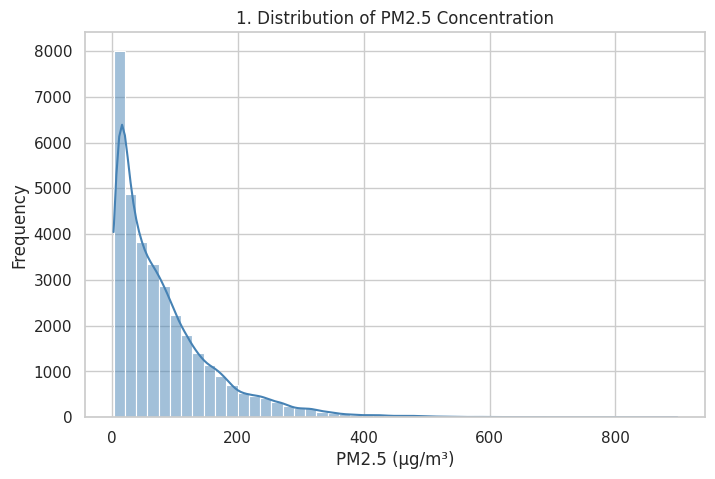

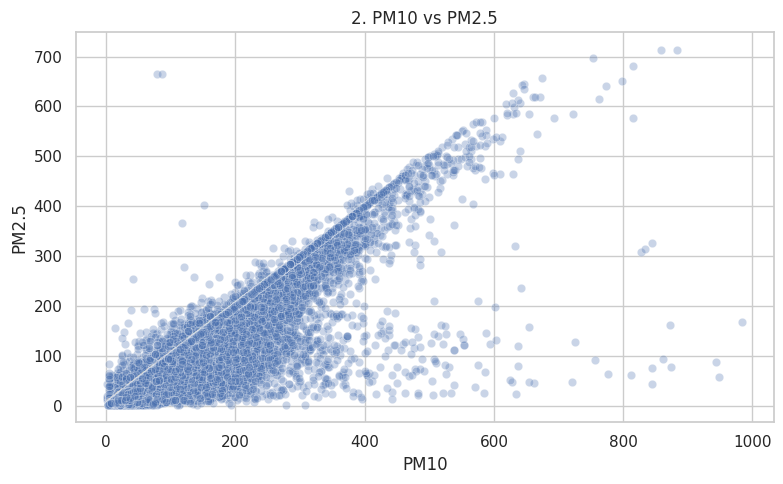

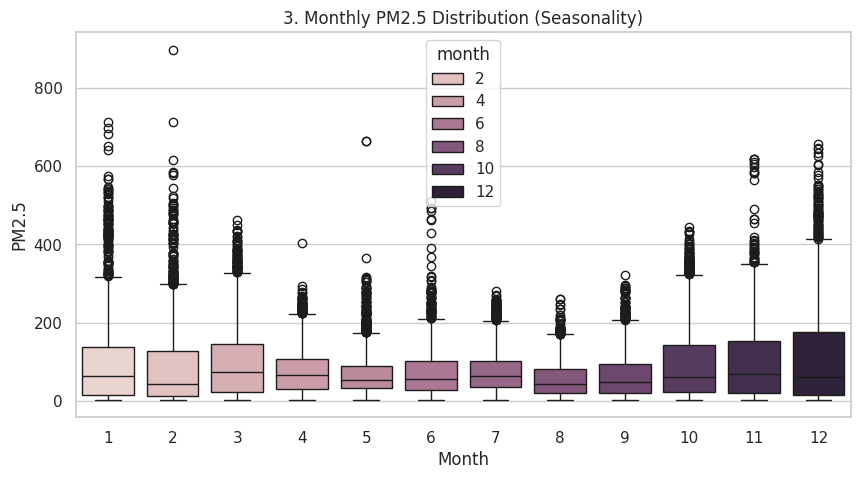

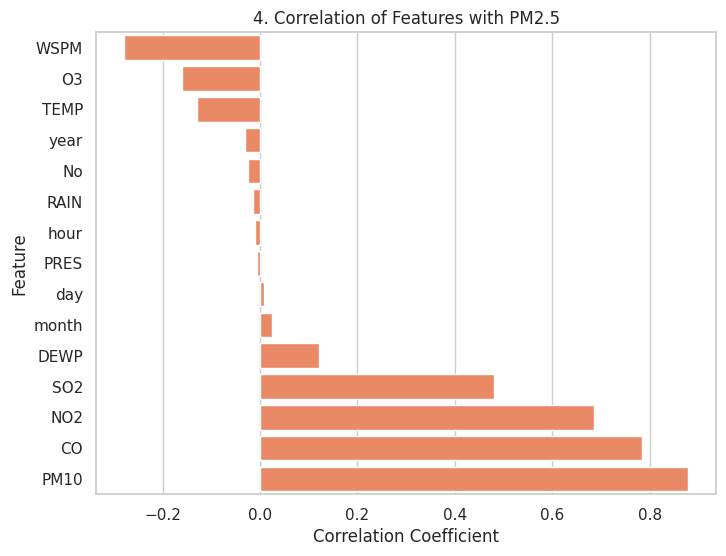

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set clean style
sns.set(style="whitegrid")
palette = "Set2"

plt.figure(figsize=(8, 5))
sns.histplot(df_clean["PM2.5"], bins=50, kde=True, color="steelblue")
plt.title("1. Distribution of PM2.5 Concentration")
plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x="PM10", y="PM2.5", data=df_clean, alpha=0.3)
plt.title("2. PM10 vs PM2.5")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="month", y="PM2.5", data=df_clean, hue='month')
plt.title("3. Monthly PM2.5 Distribution (Seasonality)")
plt.xlabel("Month")
plt.ylabel("PM2.5")
plt.show()

numeric_df = df_clean.select_dtypes(include=["int64", "float64"])
corr_target = numeric_df.corr()["PM2.5"].drop("PM2.5").sort_values()

plt.figure(figsize=(8, 6))
sns.barplot(x=corr_target.values, y=corr_target.index, color="coral")
plt.title("4. Correlation of Features with PM2.5")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()


###Key Insights From Visualization

####PM2.5 Distribution

- PM2.5 values are right-skewed, with most observations at low to moderate levels and a few extreme pollution events at very high concentrations.

- These outliers indicate occasional severe air quality episodes that are important for analysis.

####PM10 vs PM2.5

- PM2.5 shows a strong positive relationship with PM10, suggesting shared pollution sources.

- Greater variability appears at higher concentrations, especially during heavy pollution periods.

####Seasonal Variation

- PM2.5 exhibits clear seasonality.

- Higher concentrations occur in winter months (Nov–Feb), while summer months show lower and more stable levels.

####Correlation with Other Features

- Strong positive correlations with PM2.5:

      PM10, CO, NO2, SO2

- Negative correlations:

      Temperature (TEMP)

      Ozone (O3)

      Wind Speed (WSPM)

      This indicates higher PM2.5 during colder, low-wind conditions.

####Overall Observations

- Pollutant variables are the strongest predictors of PM2.5.

- Meteorological factors influence dispersion but are secondary.

- No severe multicollinearity is evident, making the features suitable for modeling.

#Task 2: Build a Neural Network Model

In [8]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Target and features
X = df_clean.drop("PM2.5", axis=1)
y = df_clean["PM2.5"]

# Identify feature types
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include=["object"]).columns

# Numeric features → median
for col in numeric_cols:
    X[col] = X[col].fillna(X[col].median())

# Categorical features → most frequent
for col in categorical_cols:
    X[col] = X[col].fillna(X[col].mode()[0])

print("Missing values after imputation:", X.isnull().sum().sum())

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print("Final feature shape after encoding:", X_encoded.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42,
    early_stopping=True
)

print("\nNETWORK ARCHITECTURE")

print(f"- Input Layer: {X_train_scaled.shape[1]} neurons")
print("- Hidden Layer 1: 64 neurons (ReLU)")
print("- Hidden Layer 2: 32 neurons (ReLU)")
print("- Output Layer: 1 neuron (Regression Output)")
print("- Loss Function: Mean Squared Error")
print("- Optimizer: Adam")

print("\nTraining Neural Network Regressor...")
mlp.fit(X_train_scaled, y_train)

print(f"Training completed in {mlp.n_iter_} iterations")
print(f"Final training loss (MSE): {mlp.loss_:.4f}")

y_train_pred = mlp.predict(X_train_scaled)

print("\nTRAINING SET METRICS")

print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}")
print(f"MAE:  {mean_absolute_error(y_train, y_train_pred):.2f}")
print(f"R²:   {r2_score(y_train, y_train_pred):.4f}")

y_test_pred = mlp.predict(X_test_scaled)

print("\nTEST SET METRICS")

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")
print(f"MAE:  {mean_absolute_error(y_test, y_test_pred):.2f}")
print(f"R²:   {r2_score(y_test, y_test_pred):.4f}")


Missing values after imputation: 0
Final feature shape after encoding: (34119, 30)
Training set: (27295, 30)
Test set: (6824, 30)

NETWORK ARCHITECTURE
- Input Layer: 30 neurons
- Hidden Layer 1: 64 neurons (ReLU)
- Hidden Layer 2: 32 neurons (ReLU)
- Output Layer: 1 neuron (Regression Output)
- Loss Function: Mean Squared Error
- Optimizer: Adam

Training Neural Network Regressor...
Training completed in 171 iterations
Final training loss (MSE): 188.3769

TRAINING SET METRICS
RMSE: 19.56
MAE:  12.86
R²:   0.9425

TEST SET METRICS
RMSE: 22.44
MAE:  13.96
R²:   0.9293


#Task 3: Build Primary Model

In [9]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df_clean.drop("PM2.5", axis=1)
y = df_clean["PM2.5"]

# Identify numeric and categorical features
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include=["object"]).columns

# Numeric features → median
for col in numeric_cols:
    X[col] = X[col].fillna(X[col].median())

# Categorical features → most frequent
for col in categorical_cols:
    X[col] = X[col].fillna(X[col].mode()[0])

print("Missing values after imputation:", X.isnull().sum().sum())

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print("Final feature shape after encoding:", X_encoded.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

lin_reg = LinearRegression()

print("\nTraining Linear Regression...")
lin_reg.fit(X_train_scaled, y_train)
print("Linear Regression trained successfully!")

dt_reg = DecisionTreeRegressor(
    max_depth=5,
    random_state=42
)

print("\nTraining Decision Tree Regressor...")
dt_reg.fit(X_train, y_train)   # Tree does NOT need scaling
print("Decision Tree Regressor trained successfully!")


pred_lin = lin_reg.predict(X_test_scaled)
pred_dt  = dt_reg.predict(X_test)

print("\nMODEL PERFORMANCE (TEST SET)")

# Linear Regression Metrics
print("\nLinear Regression:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, pred_lin)):.2f}")
print(f"MAE:  {mean_absolute_error(y_test, pred_lin):.2f}")
print(f"R²:   {r2_score(y_test, pred_lin):.4f}")

# Decision Tree Metrics
print("\nDecision Tree Regressor:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, pred_dt)):.2f}")
print(f"MAE:  {mean_absolute_error(y_test, pred_dt):.2f}")
print(f"R²:   {r2_score(y_test, pred_dt):.4f}")


print("\nMODEL COMPARISON:")

print(f"{'Metric':<15} {'Linear Reg':<20} {'Decision Tree':<20}")

metrics = {
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, pred_lin)),
        np.sqrt(mean_squared_error(y_test, pred_dt))
    ],
    "MAE": [
        mean_absolute_error(y_test, pred_lin),
        mean_absolute_error(y_test, pred_dt)
    ],
    "R²": [
        r2_score(y_test, pred_lin),
        r2_score(y_test, pred_dt)
    ]
}

for metric, values in metrics.items():
    print(f"{metric:<15} {values[0]:<20.4f} {values[1]:<20.4f}")


print("\nCONCLUSION")

if metrics["R²"][1] > metrics["R²"][0]:
    print("Best Model: Decision Tree Regressor")
    print("Justification:")
    print("- Higher R² score indicating better variance explanation")
    print("- Captures non-linear relationships between pollutants and weather variables")
    print("- Performs well on complex environmental data")
else:
    print("Best Model: Linear Regression")
    print("Justification:")
    print("- Better generalization on test data")
    print("- Lower error values (RMSE / MAE)")
    print("- Simpler and more interpretable baseline model")




Missing values after imputation: 0
Final feature shape after encoding: (34119, 30)
Training set: (27295, 30)
Test set: (6824, 30)

Training Linear Regression...
Linear Regression trained successfully!

Training Decision Tree Regressor...
Decision Tree Regressor trained successfully!

MODEL PERFORMANCE (TEST SET)

Linear Regression:
RMSE: 31.93
MAE:  20.73
R²:   0.8568

Decision Tree Regressor:
RMSE: 30.97
MAE:  19.41
R²:   0.8653

MODEL COMPARISON:
Metric          Linear Reg           Decision Tree       
RMSE            31.9332              30.9657             
MAE             20.7347              19.4108             
R²              0.8568               0.8653              

CONCLUSION
Best Model: Decision Tree Regressor
Justification:
- Higher R² score indicating better variance explanation
- Captures non-linear relationships between pollutants and weather variables
- Performs well on complex environmental data


In [10]:
print("""
NOTE:
Both Linear Regression and Decision Tree Regression models were implemented
with manual preprocessing steps, including:
- Handling missing values (median for numeric features, most frequent for categorical features)
- One-hot encoding of categorical variables
- Feature scaling using StandardScaler (applied to linear models)

These steps ensure the dataset is properly prepared for regression-based
model training and evaluation, while maintaining consistency and fairness
across all regression models.
""")



NOTE:
Both Linear Regression and Decision Tree Regression models were implemented
with manual preprocessing steps, including:
- Handling missing values (median for numeric features, most frequent for categorical features)
- One-hot encoding of categorical variables
- Feature scaling using StandardScaler (applied to linear models)

These steps ensure the dataset is properly prepared for regression-based
model training and evaluation, while maintaining consistency and fairness
across all regression models.




#Task 4: Hyper-parameter Optimization with Cross-Validation

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

print("RIDGE REGRESSION HYPERPARAMETERS:")
print("- alpha: Regularization strength (controls model complexity)")
print("- max_iter: Maximum number of optimization iterations")

print("\nDECISION TREE REGRESSOR HYPERPARAMETERS:")
print("- max_depth: Maximum depth of the tree")
print("- min_samples_split: Minimum samples required to split a node")
print("- min_samples_leaf: Minimum samples required at a leaf node")
print("- criterion: Measure of split quality")

print("\nHyperparameters tuned using GridSearchCV with 5-fold cross-validation for ridge regression and 3-fold cross-validation for decision tree regression")


# RIDGE REGRESSION (SCALED DATA)

param_grid_ridge = {
    "alpha": [0.1, 1.0, 10.0],
    "max_iter": [1000]
}

grid_ridge = GridSearchCV(
    Ridge(random_state=42),
    param_grid_ridge,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

print("Tuning Ridge Regression...")
grid_ridge.fit(X_train_scaled, y_train)
print("Ridge Regression tuning complete!")

# DECISION TREE REGRESSOR

param_grid_dt = {
    "max_depth": [3, 5, 7, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

grid_dt = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid_dt,
    cv=3,
    scoring="r2",
    n_jobs=-1
)

print("\nTuning Decision Tree Regressor...")
grid_dt.fit(X_train, y_train)  # No scaling needed
print("Decision Tree Regressor tuning complete!")


# RESULTS

print("\nBEST HYPERPARAMETERS & CV SCORES")

print("\nRIDGE REGRESSION:")
print(f"Best Parameters: {grid_ridge.best_params_}")
print(f"Best CV R² Score: {grid_ridge.best_score_:.4f}")

print("\nDECISION TREE REGRESSOR:")
print(f"Best Parameters: {grid_dt.best_params_}")
print(f"Best CV R² Score: {grid_dt.best_score_:.4f}")

print("\nSUMMARY:")

if grid_ridge.best_score_ > grid_dt.best_score_:
    print("Best Model: Ridge Regression")
    print("Reason: Better generalization performance based on cross-validated R² score")
else:
    print("Best Model: Decision Tree Regressor")
    print("Reason: Better captures non-linear relationships in air pollution data")


RIDGE REGRESSION HYPERPARAMETERS:
- alpha: Regularization strength (controls model complexity)
- max_iter: Maximum number of optimization iterations

DECISION TREE REGRESSOR HYPERPARAMETERS:
- max_depth: Maximum depth of the tree
- min_samples_split: Minimum samples required to split a node
- min_samples_leaf: Minimum samples required at a leaf node
- criterion: Measure of split quality

Hyperparameters tuned using GridSearchCV with 5-fold cross-validation for ridge regression and 3-fold cross-validation for decision tree regression
Tuning Ridge Regression...
Ridge Regression tuning complete!

Tuning Decision Tree Regressor...
Decision Tree Regressor tuning complete!

BEST HYPERPARAMETERS & CV SCORES

RIDGE REGRESSION:
Best Parameters: {'alpha': 0.1, 'max_iter': 1000}
Best CV R² Score: 0.8456

DECISION TREE REGRESSOR:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best CV R² Score: 0.9016

SUMMARY:
Best Model: Decision Tree Regressor
Reason: Better c

#Task 5: Feature Selection

In [12]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

print("Chosen Method: SelectFromModel")
print("Type: Embedded Method")
print("Reason: Uses model's built-in feature importance during training\n")

# Use best Ridge Regression from GridSearchCV
best_ridge = grid_ridge.best_estimator_

# Embedded selection using coefficient magnitudes
selector_ridge = SelectFromModel(best_ridge, max_features=10)
selector_ridge.fit(X_train_scaled, y_train)

# Get selected features
selected_features_ridge = X_encoded.columns[
    selector_ridge.get_support()
].tolist()

print("\nRIDGE REGRESSION - SELECTED FEATURES:")

for i, feature in enumerate(selected_features_ridge, 1):
    print(f"{i}. {feature}")

print(f"\nTotal features selected: {len(selected_features_ridge)}\n")

# Use best Decision Tree Regressor from GridSearchCV
best_dt = grid_dt.best_estimator_

# Embedded selection using feature importance
selector_dt = SelectFromModel(best_dt, max_features=10)
selector_dt.fit(X_train, y_train)   # tree does not require scaling

# Get selected features
selected_features_dt = X_encoded.columns[
    selector_dt.get_support()
].tolist()

print("\nDECISION TREE REGRESSOR - SELECTED FEATURES:")

for i, feature in enumerate(selected_features_dt, 1):
    print(f"{i}. {feature}")

print(f"\nTotal features selected: {len(selected_features_dt)}\n")

print("\nJUSTIFICATION:")

print("\n1. WHY EMBEDDED METHOD?")

print("- Efficient: Feature selection occurs during model training")
print("- Model-driven: Importance is learned directly from the data")
print("- No repeated training required (unlike wrapper methods)")

print("\n2. WHY SelectFromModel?")

print("- Automatically selects most influential features")
print("- Ridge Regression: Uses coefficient magnitudes for importance")
print("- Decision Tree: Uses impurity-based feature importance")

print("\n3. WHY TOP 10 FEATURES?")

print("- Reduces dimensionality while retaining predictive power")
print("- Removes weak and redundant predictors")
print("- Improves model interpretability")

print("\n4. BENEFITS:")

print("- Faster model training")
print("- Reduced overfitting")
print("- Improved generalization performance")
print("- Easier interpretation of PM2.5 drivers")


Chosen Method: SelectFromModel
Type: Embedded Method
Reason: Uses model's built-in feature importance during training


RIDGE REGRESSION - SELECTED FEATURES:
1. No
2. year
3. month
4. PM10

Total features selected: 4


DECISION TREE REGRESSOR - SELECTED FEATURES:
1. PM10
2. CO

Total features selected: 2


JUSTIFICATION:

1. WHY EMBEDDED METHOD?
- Efficient: Feature selection occurs during model training
- Model-driven: Importance is learned directly from the data
- No repeated training required (unlike wrapper methods)

2. WHY SelectFromModel?
- Automatically selects most influential features
- Ridge Regression: Uses coefficient magnitudes for importance
- Decision Tree: Uses impurity-based feature importance

3. WHY TOP 10 FEATURES?
- Reduces dimensionality while retaining predictive power
- Removes weak and redundant predictors
- Improves model interpretability

4. BENEFITS:
- Faster model training
- Reduced overfitting
- Improved generalization performance
- Easier interpretation o

#Task 6: Final Models and Comparative Analysis

In [14]:

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# FINAL MODEL 1: RIDGE REGRESSION

final_ridge = Ridge(
    alpha=grid_ridge.best_params_['alpha'],
    max_iter=1000,
    random_state=42
)

final_ridge.fit(X_train_scaled, y_train)

print("Final Ridge Regression model trained!")
print(f"Best Hyperparameters: {grid_ridge.best_params_}")

# Predictions
y_pred_ridge = final_ridge.predict(X_test_scaled)

# Metrics
r2_ridge   = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge  = mean_absolute_error(y_test, y_pred_ridge)

print("\nRidge Regression Performance:")
print(f"R² Score: {r2_ridge:.4f}")
print(f"RMSE:     {rmse_ridge:.4f}")
print(f"MAE:      {mae_ridge:.4f}")


# FINAL MODEL 2: DECISION TREE REGRESSOR

final_dt = DecisionTreeRegressor(
    max_depth=grid_dt.best_params_['max_depth'],
    min_samples_split=grid_dt.best_params_['min_samples_split'],
    min_samples_leaf=grid_dt.best_params_['min_samples_leaf'],
    random_state=42
)

final_dt.fit(X_train, y_train)

print("\nFinal Decision Tree Regressor trained!")
print(f"Best Hyperparameters: {grid_dt.best_params_}")

# Predictions
y_pred_dt = final_dt.predict(X_test)

# Metrics
r2_dt   = r2_score(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mae_dt  = mean_absolute_error(y_test, y_pred_dt)

print("\nDecision Tree Regressor Performance:")
print(f"R² Score: {r2_dt:.4f}")
print(f"RMSE:     {rmse_dt:.4f}")
print(f"MAE:      {mae_dt:.4f}")


# COMPARISON TABLE

print("\nTABLE: COMPARISON OF FINAL REGRESSION MODELS")

print(f"{'Model':<25} {'Features':<20} {'CV R²':<12} {'Test R²':<12} {'RMSE':<12} {'MAE':<12}")
print("-" * 110)

print(f"{'Ridge Regression':<25} Selected({len(selected_features_ridge)}){' '*8} {grid_ridge.best_score_:<12.4f} {r2_ridge:<12.4f} {rmse_ridge:<12.4f} {mae_ridge:<12.4f}")
print(f"{'Decision Tree':<25} Selected({len(selected_features_dt)}){' '*8} {grid_dt.best_score_:<12.4f} {r2_dt:<12.4f} {rmse_dt:<12.4f} {mae_dt:<12.4f}")

print("-" * 110)


# BEST MODEL

print("\nBEST MODEL:")
if r2_ridge > r2_dt:
    print("Ridge Regression")
    print("Reason:")
    print("- Higher R² score on test data")
    print("- Better generalization due to regularization")
else:
    print("Decision Tree Regressor")
    print("Reason:")
    print("- Better captures non-linear relationships")
    print("- Automatically handles feature interactions without explicit feature engineering")



Final Ridge Regression model trained!
Best Hyperparameters: {'alpha': 0.1, 'max_iter': 1000}

Ridge Regression Performance:
R² Score: 0.8556
RMSE:     32.0614
MAE:      20.8619

Final Decision Tree Regressor trained!
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

Decision Tree Regressor Performance:
R² Score: 0.9073
RMSE:     25.6893
MAE:      15.0124

TABLE: COMPARISON OF FINAL REGRESSION MODELS
Model                     Features             CV R²        Test R²      RMSE         MAE         
--------------------------------------------------------------------------------------------------------------
Ridge Regression          Selected(4)         0.8456       0.8556       32.0614      20.8619     
Decision Tree             Selected(2)         0.9016       0.9073       25.6893      15.0124     
--------------------------------------------------------------------------------------------------------------

BEST MODEL:
Decision Tree Regressor
Reas